In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf
from datetime import timedelta

df = yf.download('BTC-USD', start='2022-12-01', end='2023-04-30')
price = df['Close']

[*********************100%***********************]  1 of 1 completed


In [5]:
X = price.values
datesX = price.index
size = int(len(X) * 0.70)
train, test = X[:size], X[size:]
plotDates = datesX[size:]


def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

days_in_year = 90
differenced = difference(train, days_in_year)

[16967.1328125  17088.66015625 16908.23632812 17130.48632812
 16974.82617188 17089.50390625 16848.12695312 17233.47460938
 17133.15234375 17128.72460938 17104.19335938 17206.4375
 17781.31835938 17815.65039062 17364.86523438 16647.484375
 16795.09179688 16757.9765625  16439.6796875  16906.3046875
 16817.53515625 16830.34179688 16796.953125   16847.75585938
 16841.98632812 16919.8046875  16717.17382812 16552.57226562
 16642.34179688 16602.5859375  16547.49609375 16625.08007812
 16688.47070312 16679.85742188 16863.23828125 16836.73632812
 16951.96875    16955.078125   17091.14453125 17196.5546875
 17446.29296875 17934.89648438 18869.58789062 19909.57421875
 20976.29882812 20880.79882812 21169.6328125  21161.51953125
 20688.78125    21086.79296875 22676.55273438 22777.625
 22720.41601562 22934.43164062 22636.46875    23117.859375
 23032.77734375 23078.72851562 23031.08984375 23774.56640625
 22840.13867188 23139.28320312 23723.76953125 23471.87109375
 23449.32226562 23331.84765625 22955.66

In [3]:
model = ARIMA(differenced, order=(5, 1, 0))
model_fit = model.fit()


df_actual = yf.download('BTC-USD', start='2023-05-01', end='2023-10-31')
actual_values = df_actual['Close'].values
actual_dates = df_actual.index
forecast_length = len(actual_values)


forecast = model_fit.predict(start=len(differenced), end=len(differenced) + forecast_length - 1)





C:\Users\Michał\Desktop\crypto_predict\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
[*********************100%***********************]  1 of 1 completed


Test RMSE: 5916.990


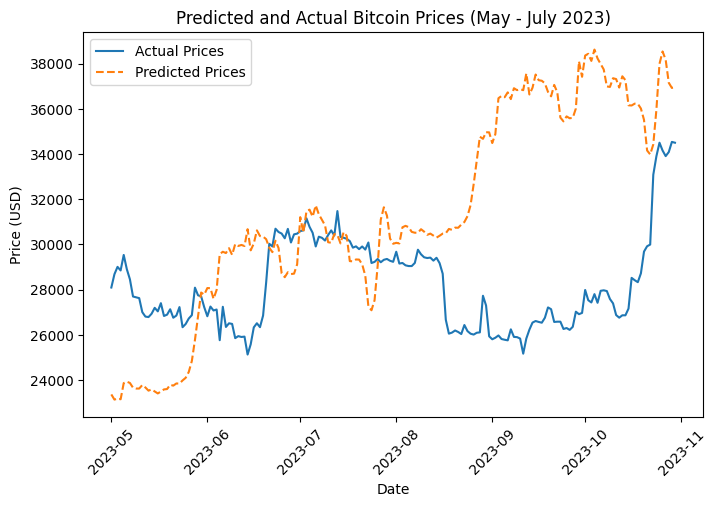

In [4]:
history = [x for x in train]
predicted_results = []
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    predicted_results.append(inverted)

predicted_results = predicted_results[:len(actual_values)]

rmse = np.sqrt(mean_squared_error(actual_values, predicted_results))
print(f'Test RMSE: {rmse:.3f}')

# Plot residuals for model diagnostics
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot(title='Residuals')
# plt.show()
# residuals.plot(kind='kde', title='Density Plot of Residuals')
# plt.show()

# Plot predicted vs actual prices for the forecast period
plt.figure(figsize=(8, 5))
plt.plot(actual_dates, actual_values, label='Actual Prices')
plt.plot(actual_dates, predicted_results, label='Predicted Prices', linestyle='--')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.title('Predicted and Actual Bitcoin Prices (May - July 2023)')
plt.show()